# Case Study on Measures of Central Tendency and Dispersion
SHUHAIB T P

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [43]:
#reading the given dataset
data=pd.read_csv("StudentsPerformance.csv")
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


In [10]:
#To know the data structure
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


# 1. Find out how many males and females participated in the test

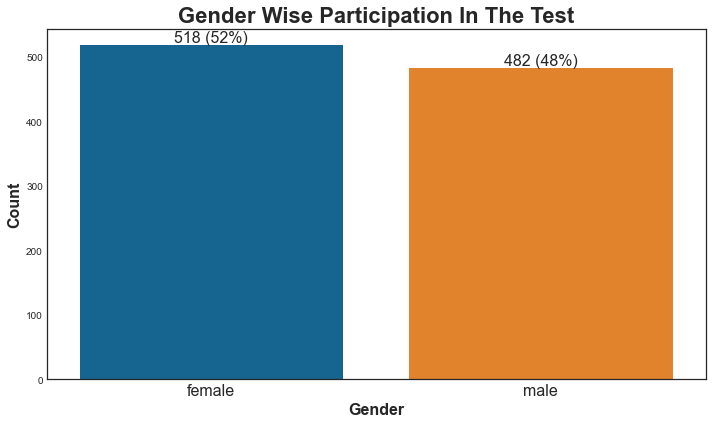

In [24]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x=data['gender'],
                   order=data['gender'].value_counts(ascending=False).index);
        
abs_values = data['gender'].value_counts(ascending=False)
rel_values = data['gender'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls,fontsize=16)
plt.title('Gender Wise Participation In The Test', fontsize=22,fontweight="bold")
plt.xlabel('Gender', fontsize=16,fontweight="bold")
plt.ylabel('Count', fontsize=16,fontweight="bold")
plt.xticks(fontsize=16)
plt.tight_layout()
plt.show()

518 of participation are from females and 482 are from males

# 2. What do you think about the students' parental level of education

In [36]:
df=data.groupby(by=["race/ethnicity", "parental level of education"]).size().reset_index(name="counts")
df=df.sort_values('counts', ascending=False)
px.bar(data_frame=df, x="race/ethnicity", y="counts", color="parental level of education", barmode="group")

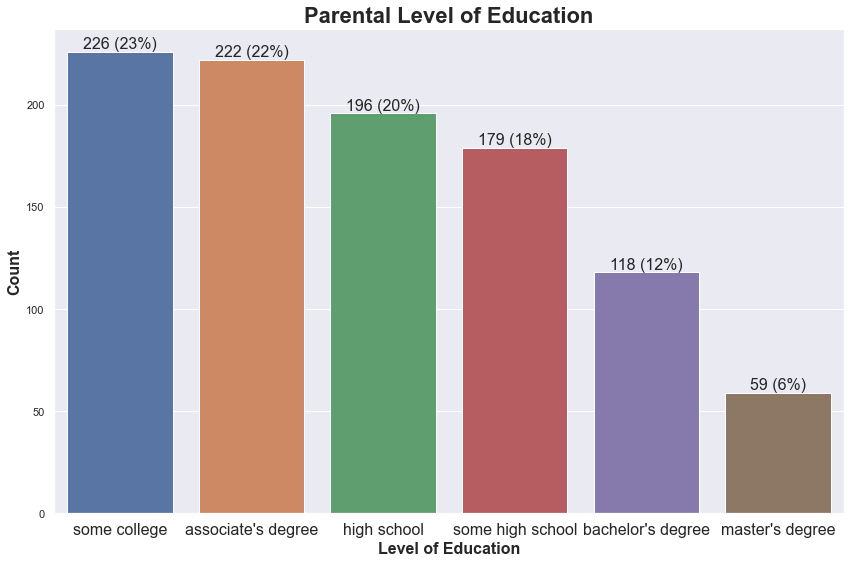

In [39]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(12,8))
ax = sns.countplot(x=data['parental level of education'],
                   order=data['parental level of education'].value_counts(ascending=False).index);
        
abs_values = data['parental level of education'].value_counts(ascending=False)
rel_values = data['parental level of education'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls,fontsize=16)
plt.title('Parental Level of Education', fontsize=22,fontweight="bold")
plt.xlabel('Level of Education', fontsize=16,fontweight="bold")
plt.ylabel('Count', fontsize=16,fontweight="bold")
plt.xticks(fontsize=16)
plt.tight_layout()
plt.show()

from above plots it is clear that the most commom parental education level is 'Some college' followed by Assoiciate's Degree, by considering Ethnicity group A&B the proportion of graduates is less compared to other groups. 
Most of the parents have a degree(23+22+12=57%),  
very least parents have level of education is Master's degree.

# Who scores the most on average for math, reading and writing based on
                ● Gender
                ● Test preparation course

In [51]:
df1=data[["gender", "math score",'reading score','writing score']].groupby("gender").mean()
df1

,math score,reading score,writing score
gender,,,
female,63.376448,72.590734,72.467181
male,68.821577,65.545643,63.446058


● For Math score male average score is greater than female

● For reading and writing female average score is greater than male

In [52]:
df2=data[["test preparation course", "math score",'reading score','writing score']].groupby("test preparation course").mean()
df2

,math score,reading score,writing score
test preparation course,,,
completed,69.96648,74.175978,74.684358
none,63.78972,66.417445,64.457944


● Test preparation course completed candidates average score is more than the Test preparation course not taken candidates for all 3 subjects

# What do you think about the scoring variation for math, reading and writing based on-   ● Gender     ● Test preparation course

In [56]:
df3=data[["gender", "math score",'reading score','writing score']].groupby("gender").var()
df3

,math score,reading score,writing score
gender,,,
female,256.958593,207.677438,220.369327
male,211.889097,200.211010,202.413924


● for all 3 subjects variance of females is greater than male

In [57]:
df4=data[["test preparation course", "math score",'reading score','writing score']].groupby("test preparation course").var()
df4

,math score,reading score,writing score
test preparation course,,,
completed,210.884027,183.265864,175.202612
none,246.668662,213.419851,226.251739


● for all 3 subjects test preparation course completed candidates variance of scores is less than that of test preparation not completed candidates

# 5. The management needs your help to give bonus points to the top 25% of students based on their maths score, so how will you help the management to achieve this

In [64]:
# To get statscal values considering whole data
data.quantile(q=[0.25,0.5, 0.75,1], axis=0, numeric_only=True, interpolation='midpoint')

,math score,reading score,writing score
0.25,57.0,59.0,58.0
0.50,66.0,70.0,69.0
0.75,77.0,79.5,79.0
1.00,100.0,100.0,100.0


From above table corresponding to math score 75% of candidates math score is below 77(3rd quantile, 75%), hence if we consider score greater than or equal to 77 we will get Top 25% students in math score, lets check the count of candidates math score greater than or equal to 77

In [74]:
df5 = data[data['math score'] >= 77] 
df5.shape

(255, 8)

Total 255 students are eligible for bonus point out of 1000 and it is 25.5% ~ 25%